In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# CNN ( Convolution Neural Network )
 : 특징을 추출하는 필터를 자동으로 생성

- 과정
 - 특징 추출 - 분류

- 특징추출을 위해 필요한 레이어
 - Convolution Layer  
  학습을 통해 필터를 추출하는 레이어
   - 1차원 : 음성 데이터

   - 2차원 : 이미지 데이터  
    이미지에는 채널이 있다.  
    흑백 : 1채널  
    보통 컬러 : RGB - 3채널 

   - 3차원 : 영상 데이터
 - Pooling Layer  
  이미지 크기를 줄이면서 중요한 정보만 남기는 레이어  
  효율적인 메모리사용과 과적합 방지에 도움을 준다.

- 분류를 위해 필요한 레이어
 - Flatten Layer : 이미지의 2차원 데이터를 1차원으로 변경
 - Dense Layer
 - Dropout Layer : 과적합을 막기위해 학습과정에서 학습에 사용되는 뉴런의 갯수를 임의로 제외 ( 학습에서만 제외 )

 Dense 레이어 마지막에는 Dropout이 배치되지 않는다.

In [ ]:
# Fashion Mnist 데이터셋을 불러온다.
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# 데이터 정규화 : 들쭉날쭉한 데이터를 0 ~ 1 사이 값으로 변환.
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# 컨볼루션 레이어로 연산을 수행해야 하기 때문에 색깔 이미지 채널을 추가한다.
# RGB는 3채널, 흑백은 1채널.
# Fashion Mnist는 흑백 이미지이기 때문에 맨 뒷쪽에 1채널을 추가한다. => 3차원 데이터가 되는 것임.
print(train_images.shape, test_images.shape)

train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


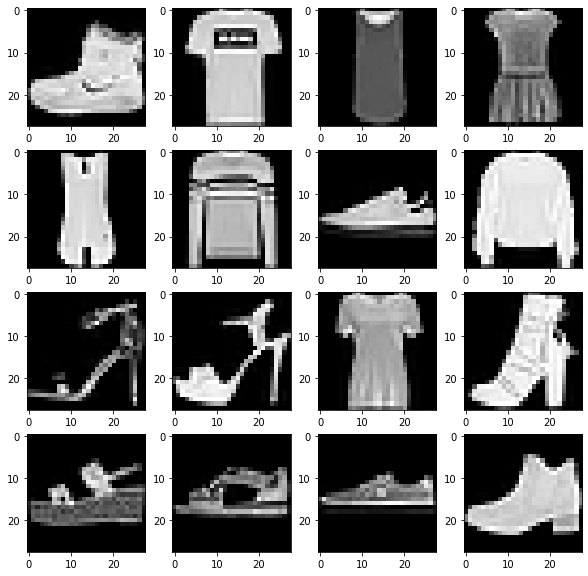

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [ ]:
plt.figure(figsize=(10, 10))

for c in range(16):
  plt.subplot(4, 4, c+1)
  # 흑백 채널을 추가했기 때문에 3차원이다.
  # 3차원은 이미지로 출력 할 수 없기 때문에, 3차원 데이터를 2차원으로 변환해주어야 한다.
  plt.imshow(train_images[c].reshape(28, 28), cmap='gray')

plt.show()

print(train_labels[:16])

In [ ]:
# 모델 생성
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32),
                             # pooling strides = (높이, 너비) 만큼 이동
                             tf.keras.layers.MaxPool2D(strides=(2, 2)),
                             tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64),
                             tf.keras.layers.MaxPool2D(strides=(2, 2)),
                             tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=128),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=128, activation='relu'),
                             # dropout rate = 제외할 뉴런의 비율 ( 학습할때만 제외함 )
                             tf.keras.layers.Dropout(rate=0.03),
                             tf.keras.layers.Dense(units=10, activation='softmax')
])

# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [ ]:
!nvidia-smi

Tue Oct 20 01:51:06 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    30W /  70W |   1125MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
history = model.fit(train_images, train_labels, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.4936 - accuracy: 0.8215 - val_loss: 0.3999 - val_accuracy: 0.8485
Epoch 2/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3295 - accuracy: 0.8798 - val_loss: 0.3041 - val_accuracy: 0.8880
Epoch 3/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2822 - accuracy: 0.8971 - val_loss: 0.3167 - val_accuracy: 0.8814
Epoch 4/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2554 - accuracy: 0.9076 - val_loss: 0.2896 - val_accuracy: 0.8951
Epoch 5/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2270 - accuracy: 0.9153 - val_loss: 0.3002 - val_accuracy: 0.8941
Epoch 6/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2058 - accuracy: 0.9239 - val_loss: 0.3111 - val_accuracy: 0.8951
Epoch 7/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1889 - accuracy: 0.9294 - val_loss: 0.3160 - val_accuracy:

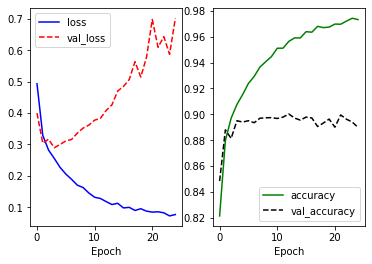

313/313 [==============================] - 1s 2ms/step - loss: 0.7311 - accuracy: 0.8890


[0.7310784459114075, 0.8889999985694885]

In [ ]:
epoch = range(1, len(history.history['loss']) + 1)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

model.evaluate(test_images, test_labels)

## 퍼포먼스 향상시키기
### 1. 더 많은 레이어 쌓기
### 2. 이미지 보강

In [ ]:
# 1. 더 많은 레이어 쌓기
# VGGNet 스타일로 구성한 컨볼루션 신경망

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32, padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64, padding='same', activation='relu'),
                             tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=128, padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=256, padding='valid', activation='relu'),
                             tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=512, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(units=256, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(units=128, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 256)        

In [ ]:
history = model.fit(train_images, train_labels, epochs=40, validation_split=0.25)

Epoch 1/40
1407/1407 [==============================] - 11s 8ms/step - loss: 0.2223 - accuracy: 0.9215 - val_loss: 0.2086 - val_accuracy: 0.9252
Epoch 2/40
1407/1407 [==============================] - 11s 8ms/step - loss: 0.2242 - accuracy: 0.9204 - val_loss: 0.2016 - val_accuracy: 0.9305
Epoch 3/40
1407/1407 [==============================] - 11s 8ms/step - loss: 0.2198 - accuracy: 0.9222 - val_loss: 0.1965 - val_accuracy: 0.9307
Epoch 4/40
1407/1407 [==============================] - 11s 8ms/step - loss: 0.2185 - accuracy: 0.9229 - val_loss: 0.1967 - val_accuracy: 0.9313
Epoch 5/40
1407/1407 [==============================] - 11s 8ms/step - loss: 0.2237 - accuracy: 0.9207 - val_loss: 0.2010 - val_accuracy: 0.9281
Epoch 6/40
 327/1407 [=====>........................] - ETA: 7s - loss: 0.2169 - accuracy: 0.9208

KeyboardInterrupt: ignored

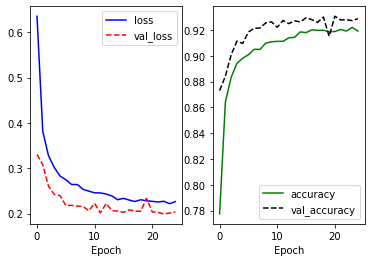

[0.19498269259929657, 0.9306666851043701]

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

model.evaluate(test_images, test_labels, verbose=0)

In [ ]:
# 이미지 보강 - ImageDataGenerator

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.10,
    shear_range = 0.5,
    width_shift_range = 0.10,
    height_shift_range = 0.10,
    horizontal_flip = True,
    vertical_flip = False
)

augment_size = 30000

randIdx = np.random.randint(train_images.shape[0], size=augment_size)
x_augmented = train_images[randIdx].copy()
y_augmented = train_labels[randIdx].copy()

x_augmented = image_generator.flow(
    x_augmented,
    np.zeros(augment_size),
    batch_size=augment_size,
    shuffle=False
).next()[0]

train_images = np.concatenate((train_images, x_augmented))
train_labels = np.concatenate((train_labels, y_augmented))

print(train_images.shape)

(90000, 28, 28, 1)


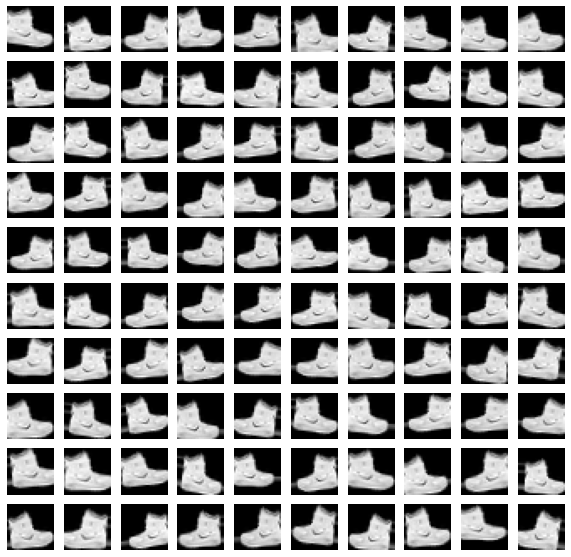

In [ ]:
plt.figure(figsize=(10, 10))
for c in range(100):
  plt.subplot(10, 10, c+1)
  plt.axis('off')
  plt.imshow(x_augmented[c].reshape(28, 28), cmap='gray')

plt.show()

In [ ]:
# CIFAR-10 을 이용한 CNN

In [ ]:
cifar = tf.keras.datasets.cifar10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
print(np.unique(train_labels))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

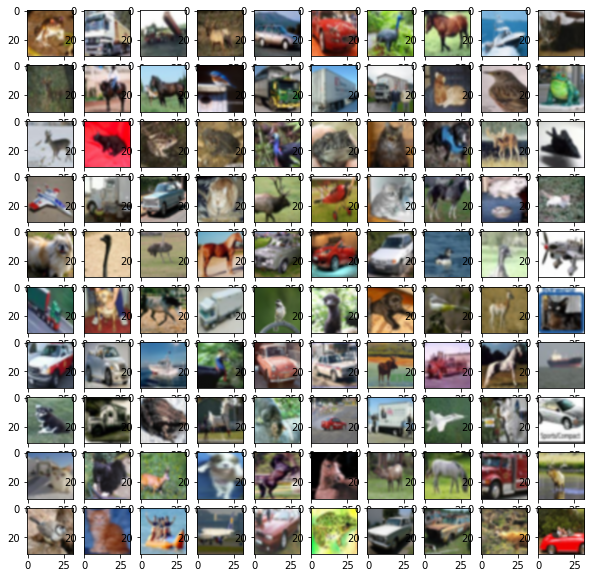

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(100):
  plt.subplot(10, 10, i+1)
  plt.imshow(train_images[i], interpolation='bicubic')

plt.show()

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape=(32, 32, 3), filters=64, kernel_size=(3, 3), activation='relu'),
                             tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=2, activation='relu'),
                             tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
                             tf.keras.layers.Dropout(rate=0.5),

                             tf.keras.layers.Conv2D(filters=256, kernel_size=(2, 2), padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(filters=512, kernel_size=(2, 2), padding='valid', activation='relu'),
                             tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
                             tf.keras.layers.Dropout(rate=0.5),

                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=256, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(units=10, activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 7, 7, 256)         131328    
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 6, 6, 512)         524800    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 512)        

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(train_images, train_labels, epochs=20, validation_split=0.25)

Epoch 1/20
1172/1172 [==============================] - 8s 7ms/step - loss: 0.8311 - accuracy: 0.7104 - val_loss: 0.7432 - val_accuracy: 0.7386
Epoch 2/20
1172/1172 [==============================] - 8s 7ms/step - loss: 0.8249 - accuracy: 0.7126 - val_loss: 0.7785 - val_accuracy: 0.7326
Epoch 3/20
1172/1172 [==============================] - 8s 7ms/step - loss: 0.8193 - accuracy: 0.7123 - val_loss: 0.7195 - val_accuracy: 0.7538
Epoch 4/20
1172/1172 [==============================] - 8s 7ms/step - loss: 0.8138 - accuracy: 0.7157 - val_loss: 0.7110 - val_accuracy: 0.7528
Epoch 5/20
1172/1172 [==============================] - 8s 7ms/step - loss: 0.8088 - accuracy: 0.7168 - val_loss: 0.7161 - val_accuracy: 0.7474
Epoch 6/20
1172/1172 [==============================] - 8s 7ms/step - loss: 0.7965 - accuracy: 0.7220 - val_loss: 0.7069 - val_accuracy: 0.7566
Epoch 7/20
1172/1172 [==============================] - 8s 7ms/step - loss: 0.7909 - accuracy: 0.7210 - val_loss: 0.7288 - val_accuracy: